In [1]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

import model_utils
import plot_utils
import custom_transforms
from dataset import COCO_Person_Dataset
from nn_model import Net
from CONSTANTS import idx_to_keypoint_type
from custom_transforms import *
import torch.nn.functional as F
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import time

In [2]:
#17 keypoints
#'nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 
#'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 
#'right_knee', 'left_ankle', 'right_ankle'


In [2]:
processed_files = {
    'img_id_to_annotations': 'img_id_to_annotations.npy',
    'img_id_to_image_info' : 'img_id_to_image_info.npy',
    'im_ids' : 'im_ids.npy'
}

In [3]:
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
mean, std = torch.tensor(mean), torch.tensor(std)

tfms = transforms.Compose([
    RandomCrop(),
    ResizeImgAndKeypoints(368),
    ColorJitter(),
    RandomGrayscale(),
    FlipHR(),
    #FlipUD(),
    #RandomRotateImgAndKeypoints()
])

tensor_tfms = transforms.Compose([
    ToTensor(),
    NormalizeImg(mean, std)
])

un = UnNormalizeImgBatch(mean, std)
To_Pil = transforms.ToPILImage()

In [4]:
bs = 8
ds = COCO_Person_Dataset('train2014/', processed_files, tfms, tensor_tfms)
dl = torch.utils.data.DataLoader(ds, bs, shuffle=True)

In [6]:
hms.shape

torch.Size([18, 368, 368])

In [22]:
model_utils.get_peaks(hms[0].numpy(), nms_window=70)

array([[ 71, 161],
       [ 71, 160],
       [ 70, 161],
       [ 70, 160]])

In [27]:
from skimage.feature import peak_local_max
from skimage import img_as_float

In [34]:
peak_local_max(img_as_float(hms[0].numpy()), min_distance=50)

array([[ 71, 161],
       [ 71, 160],
       [ 70, 161],
       [ 70, 160]])

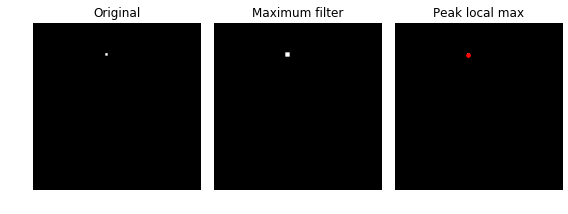

In [39]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

im = img_as_float(hms[0])

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=5, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=5)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

In [40]:
coordinates.shape

(4, 2)

In [41]:
from CONSTANTS import *

In [43]:
x = np.load('gaussian_14x14_sigma_7.npy')
y = np.load('gaussian_8x8_sigma_3.npy')

In [44]:
y

array([[0.26170886, 0.43206578, 0.55231166, 0.64640915, 0.64640915,
        0.55231166, 0.43206578, 0.26170886],
       [0.43206578, 0.7133149 , 0.9118337 , 1.067183  , 1.067183  ,
        0.9118337 , 0.7133149 , 0.43206578],
       [0.55231166, 0.9118337 , 1.1656014 , 1.3641851 , 1.3641851 ,
        1.1656014 , 0.9118337 , 0.55231166],
       [0.64640915, 1.067183  , 1.3641851 , 1.5966017 , 1.5966017 ,
        1.3641851 , 1.067183  , 0.64640915],
       [0.64640915, 1.067183  , 1.3641851 , 1.5966017 , 1.5966017 ,
        1.3641851 , 1.067183  , 0.64640915],
       [0.55231166, 0.9118337 , 1.1656014 , 1.3641851 , 1.3641851 ,
        1.1656014 , 0.9118337 , 0.55231166],
       [0.43206578, 0.7133149 , 0.9118337 , 1.067183  , 1.067183  ,
        0.9118337 , 0.7133149 , 0.43206578],
       [0.26170886, 0.43206578, 0.55231166, 0.64640915, 0.64640915,
        0.55231166, 0.43206578, 0.26170886]], dtype=float32)

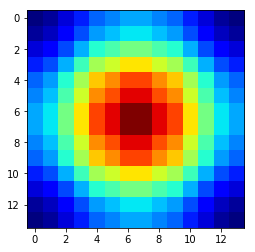

In [48]:
plt.imshow(x, cmap="jet")

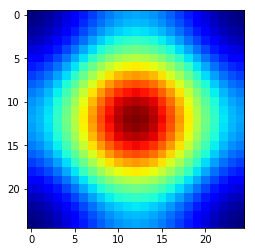

In [62]:
res = model_utils.gkern2(25,7)
plt.imshow(res,cmap="jet")

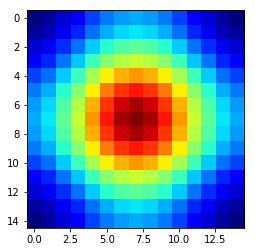

In [72]:
import PIL
from PIL import Image
aa = Image.fromarray(res)
aa = aa.resize((15,15),resample=PIL.Image.BILINEAR)
plt.imshow(aa,cmap="jet")

In [74]:
aa.size

(15, 15)

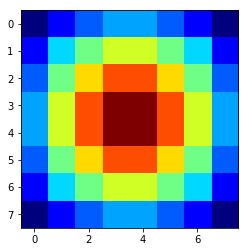

In [42]:
plt.imshow(GAUSSIAN_8X8, cmap="jet")

/Users/dhruv/miniconda3/envs/fastai-cpu/lib/python3.6/site-packages/torchvision/transforms/functional.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean, dtype=torch.float32)
/Users/dhruv/miniconda3/envs/fastai-cpu/lib/python3.6/site-packages/torchvision/transforms/functional.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std, dtype=torch.float32)


[[ 71 161]
 [ 71 160]
 [ 70 161]
 [ 70 160]] (4, 2)
[[ 64 167]
 [ 64 166]
 [ 63 167]
 [ 63 166]] (4, 2)
[[ 66 154]
 [ 66 153]
 [ 65 154]
 [ 65 153]] (4, 2)
[[ 63 178]
 [ 63 177]
 [ 62 178]
 [ 62 177]] (4, 2)
[[ 75 151]
 [ 75 150]
 [ 74 151]
 [ 74 150]] (4, 2)
[[ 95 199]
 [ 95 198]
 [ 94 199]
 [ 94 198]] (4, 2)
[[112 148]
 [112 147]
 [111 148]
 [111 147]] (4, 2)
[[118 234]
 [118 233]
 [117 234]
 [117 233]] (4, 2)
[[170 154]
 [170 153]
 [169 154]
 [169 153]] (4, 2)
[[ 76 201]
 [ 76 200]
 [ 75 201]
 [ 75 200]] (4, 2)
[[141 153]
 [141 152]
 [140 153]
 [140 152]] (4, 2)
[[184 209]
 [184 208]
 [183 209]
 [183 208]] (4, 2)
[[191 171]
 [191 170]
 [190 171]
 [190 170]] (4, 2)
[[268 223]
 [268 222]
 [267 223]
 [267 222]] (4, 2)
[[286 171]
 [286 170]
 [285 171]
 [285 170]] (4, 2)
[[327 226]
 [327 225]
 [326 226]
 [326 225]] (4, 2)
[[343 171]
 [343 170]
 [342 171]
 [342 170]] (4, 2)


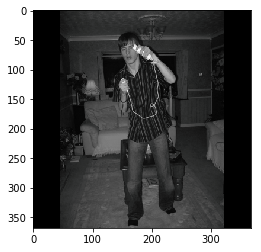

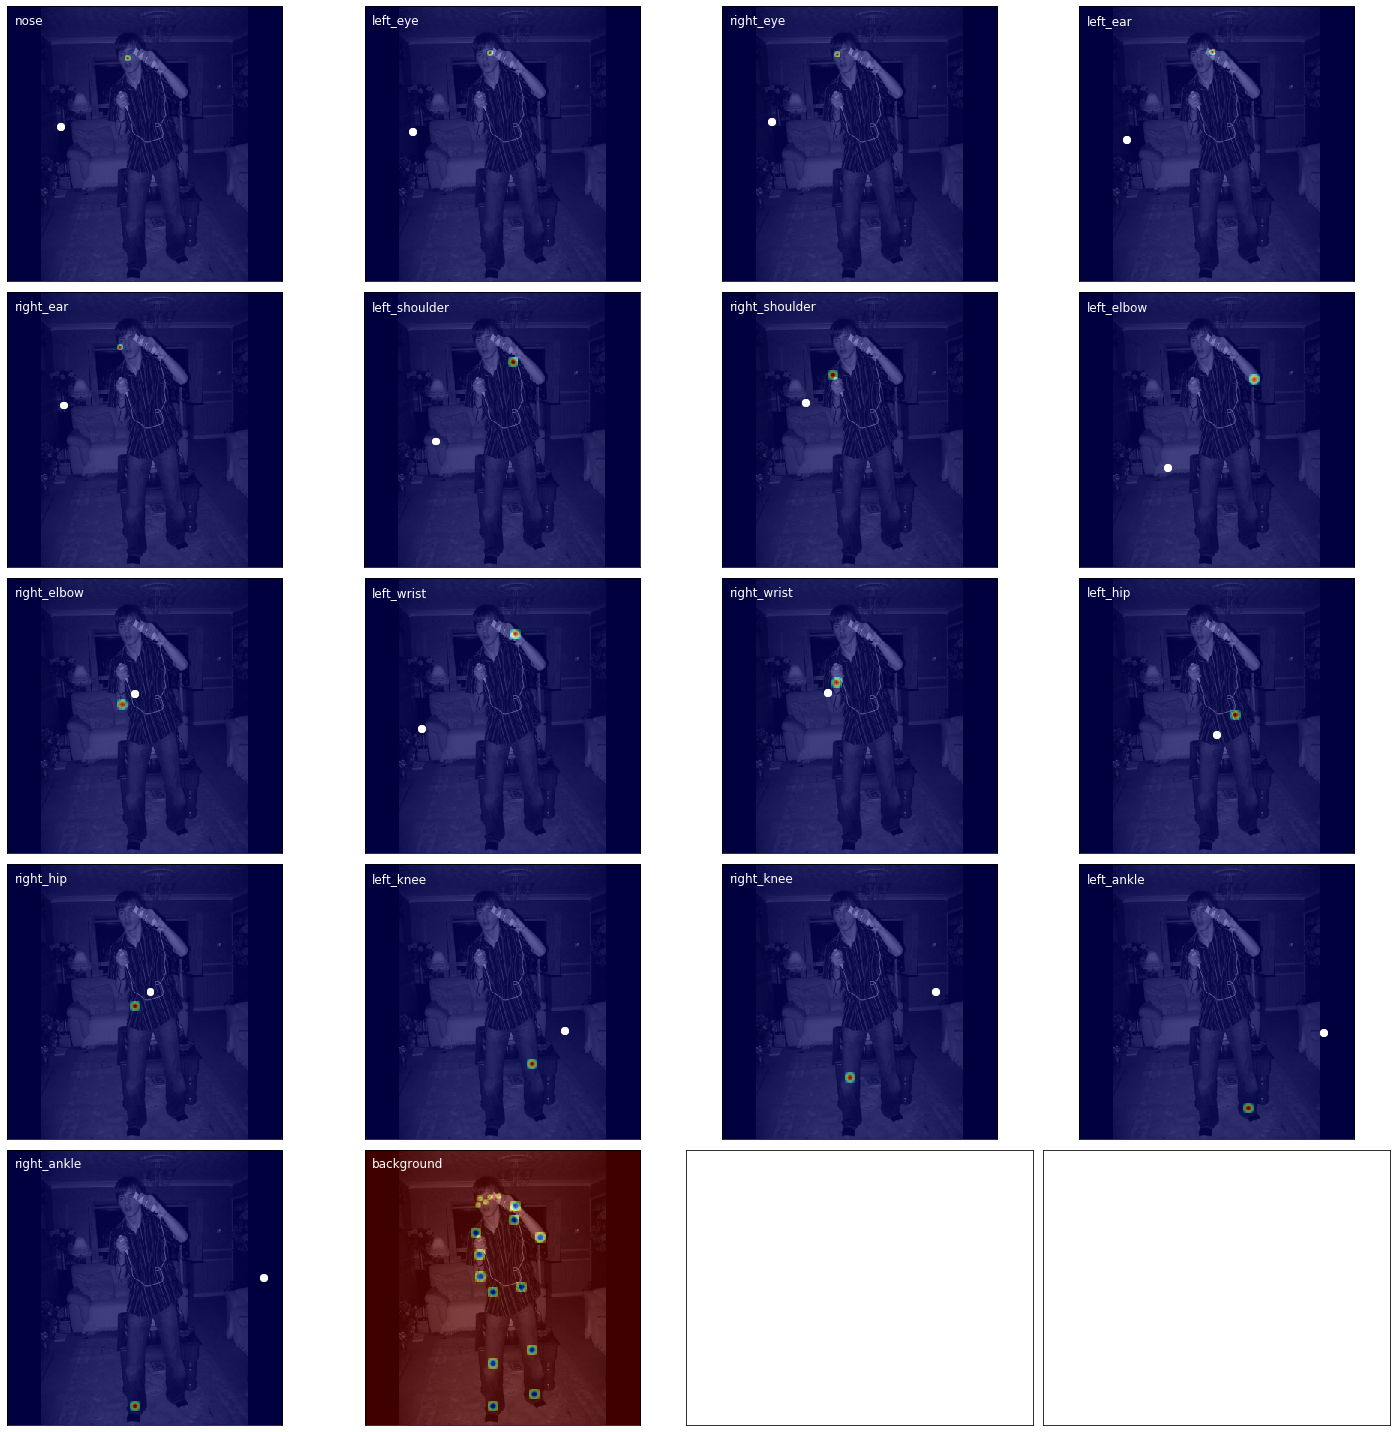

In [5]:
i,i_46x46,pafs,paf_ind,hms,hms_ind = ds[1050]
#scaled_pafs = F.interpolate(pafs[None].clone().detach(), 368, mode="bilinear", align_corners=True).to(device)[0] #mode="nearest|area"
#scaled_hms = F.interpolate(hms[None].clone().detach(), 368, mode="bilinear", align_corners=True).to(device)[0]
un_im = To_Pil(un(i)[0])
plt.imshow(un_im)
#plot_utils.plot_pafs(un_im, scaled_pafs.clone().detach().cpu().numpy(), figsize=(20,20))
plot_utils.plot_heatmaps(un_im, hms.clone().detach().cpu().numpy(), figsize=(20,20))

In [9]:
%%time 
for x,y,z,a,b,c in dl:
    break   

CPU times: user 348 ms, sys: 48 ms, total: 396 ms
Wall time: 394 ms


In [7]:
#model.set_to_inference()
model.train_paf_stage(4)
model.unfreeze_all_paf_stages()
model.unfreeze_F()
model.freeze_all_hm_stages()

In [5]:
model = Net(in_training=True)
model.load_state_dict(torch.load('hm-stage2-new-opt.ckpt', map_location="cpu"))
model.set_to_inference()

#model.freeze_F()
#model.freeze_all_paf_stages()

#model.train_hm_stage(2)
#model.unfreeze_all_hm_stages()

model.to(device)

Net(
  (F): F(
    (vgg): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1)

In [28]:
model.freeze_all_hm_stages()

In [25]:
model.train_paf_stage(4)
model.unfreeze_all_paf_stages()
model.unfreeze_F()

In [8]:
for p in model.Heatmap_Stages.Stage1.parameters():
    p.requires_grad = True

In [ ]:
for p in model.F.parameters():
    print(p.requires_grad)

In [ ]:
model.train()
n_epochs = 2
lr = 0.0001
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = lr)

total_steps = 0

for e in range(n_epochs):
    for imgs, imgs_46x46, pafs, paf_inds, hms, hm_inds in dl:
        optimizer.zero_grad()
        
        imgs, imgs_46x46, pafs, paf_inds, hms, hm_inds = imgs.to(device), imgs_46x46.to(device), pafs.to(device), paf_inds.to(device), hms.to(device), hm_inds.to(device) 
        pred_pafs, pred_hms = model(imgs, imgs_46x46)
        loss = model_utils.paf_and_heatmap_loss(pred_pafs, pafs, paf_inds, pred_hms, hms, hm_inds)
        
        loss.backward()
        optimizer.step()
        
        total_steps +=1
        if(total_steps%250==0):
            torch.save(model.state_dict(),'hm-stage2-new-opt.ckpt')
            print('saving model')
                                                       
        model_utils.print_training_loss_summary(loss.item(), total_steps, e+1, n_epochs, len(dl))

Epoch [1/2], Iteration [1/5647], Loss: 708.1670


In [ ]:
#torch.save(model.state_dict(),'stage1-trained.ckpt')

In [19]:
%%time
with torch.no_grad():
    model.eval()
    model.set_to_inference()
    imgs,imgs_46x46, _, _, _, _ = iter(dl).next()
    pred_pafs_stages, pred_hms_stages = model(imgs.to(device), imgs_46x46.to(device))
    scaled_pafs = F.interpolate(pred_pafs_stages.clone().detach(), 368, mode="bilinear", align_corners=True).to(device)
    scaled_hms = F.interpolate(pred_hms_stages.clone().detach(), 368, mode="bilinear", align_corners=True).to(device)

CPU times: user 9.12 s, sys: 1.01 s, total: 10.1 s
Wall time: 10.2 s


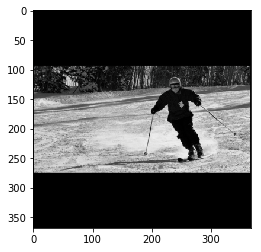

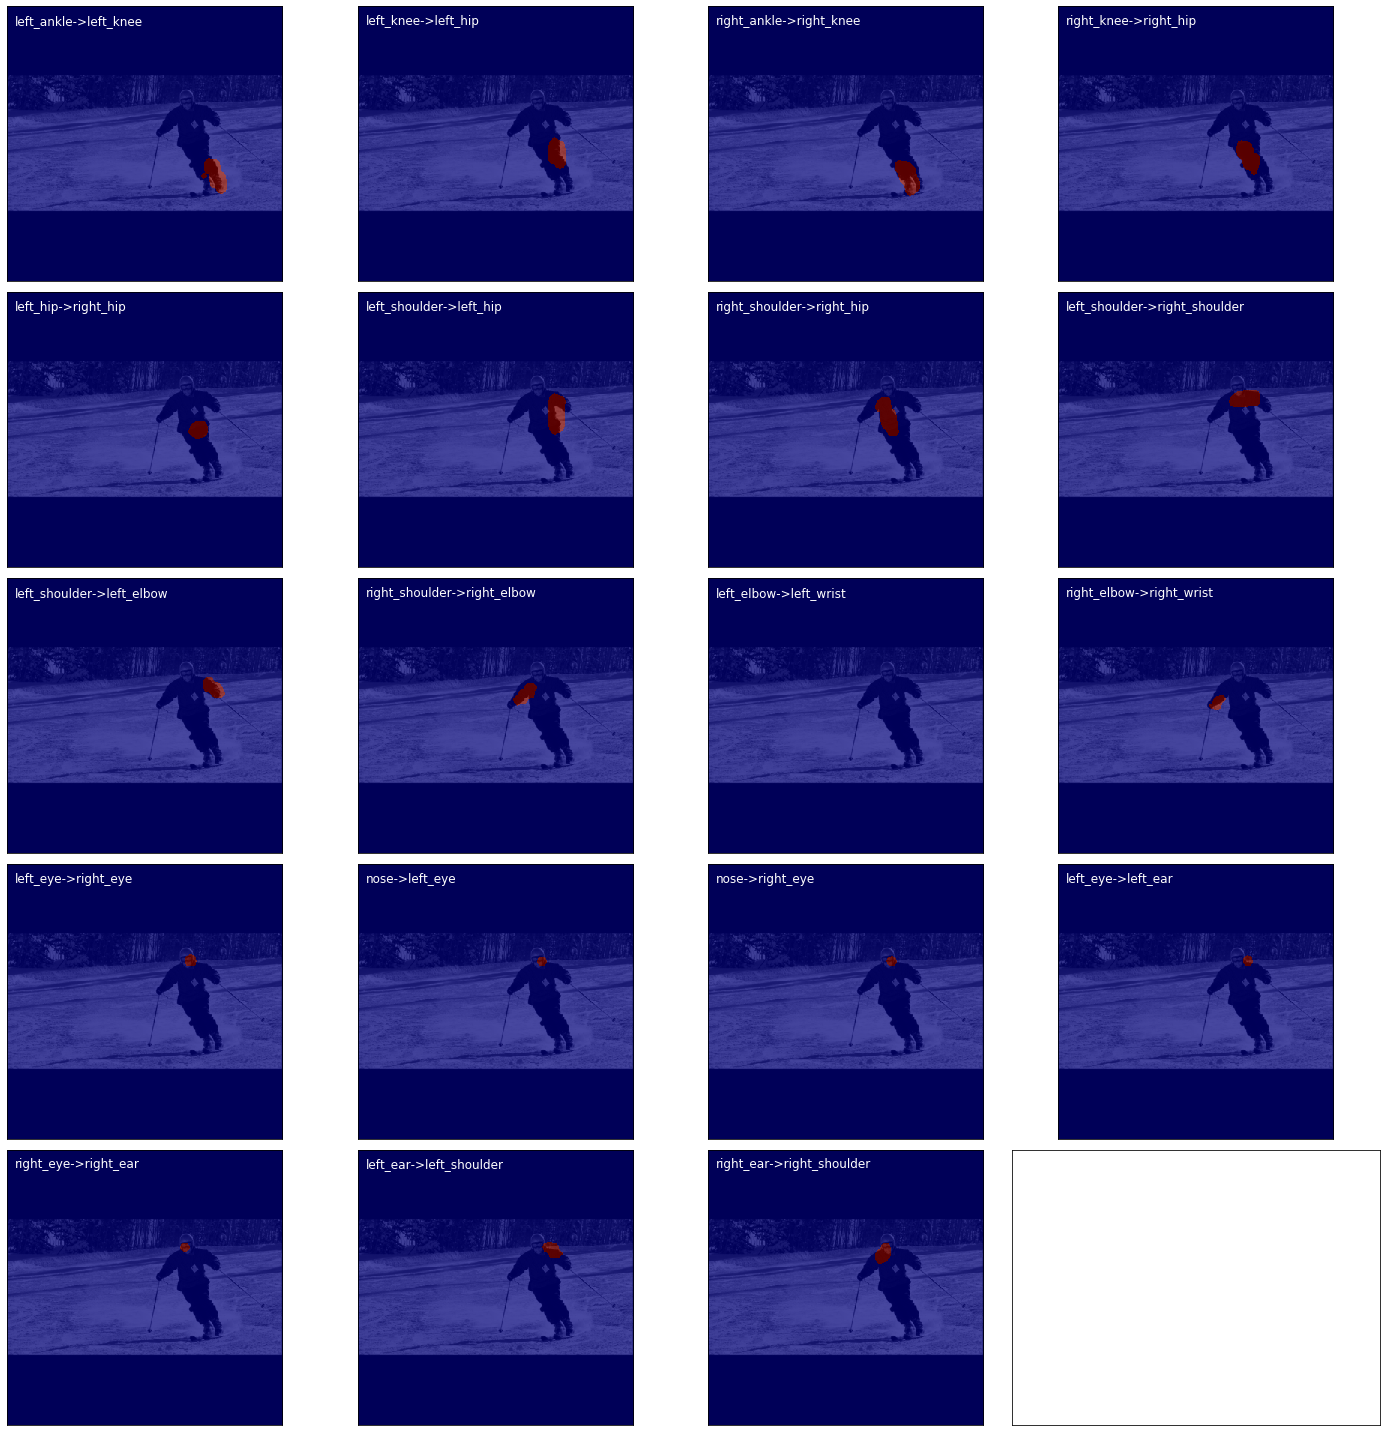

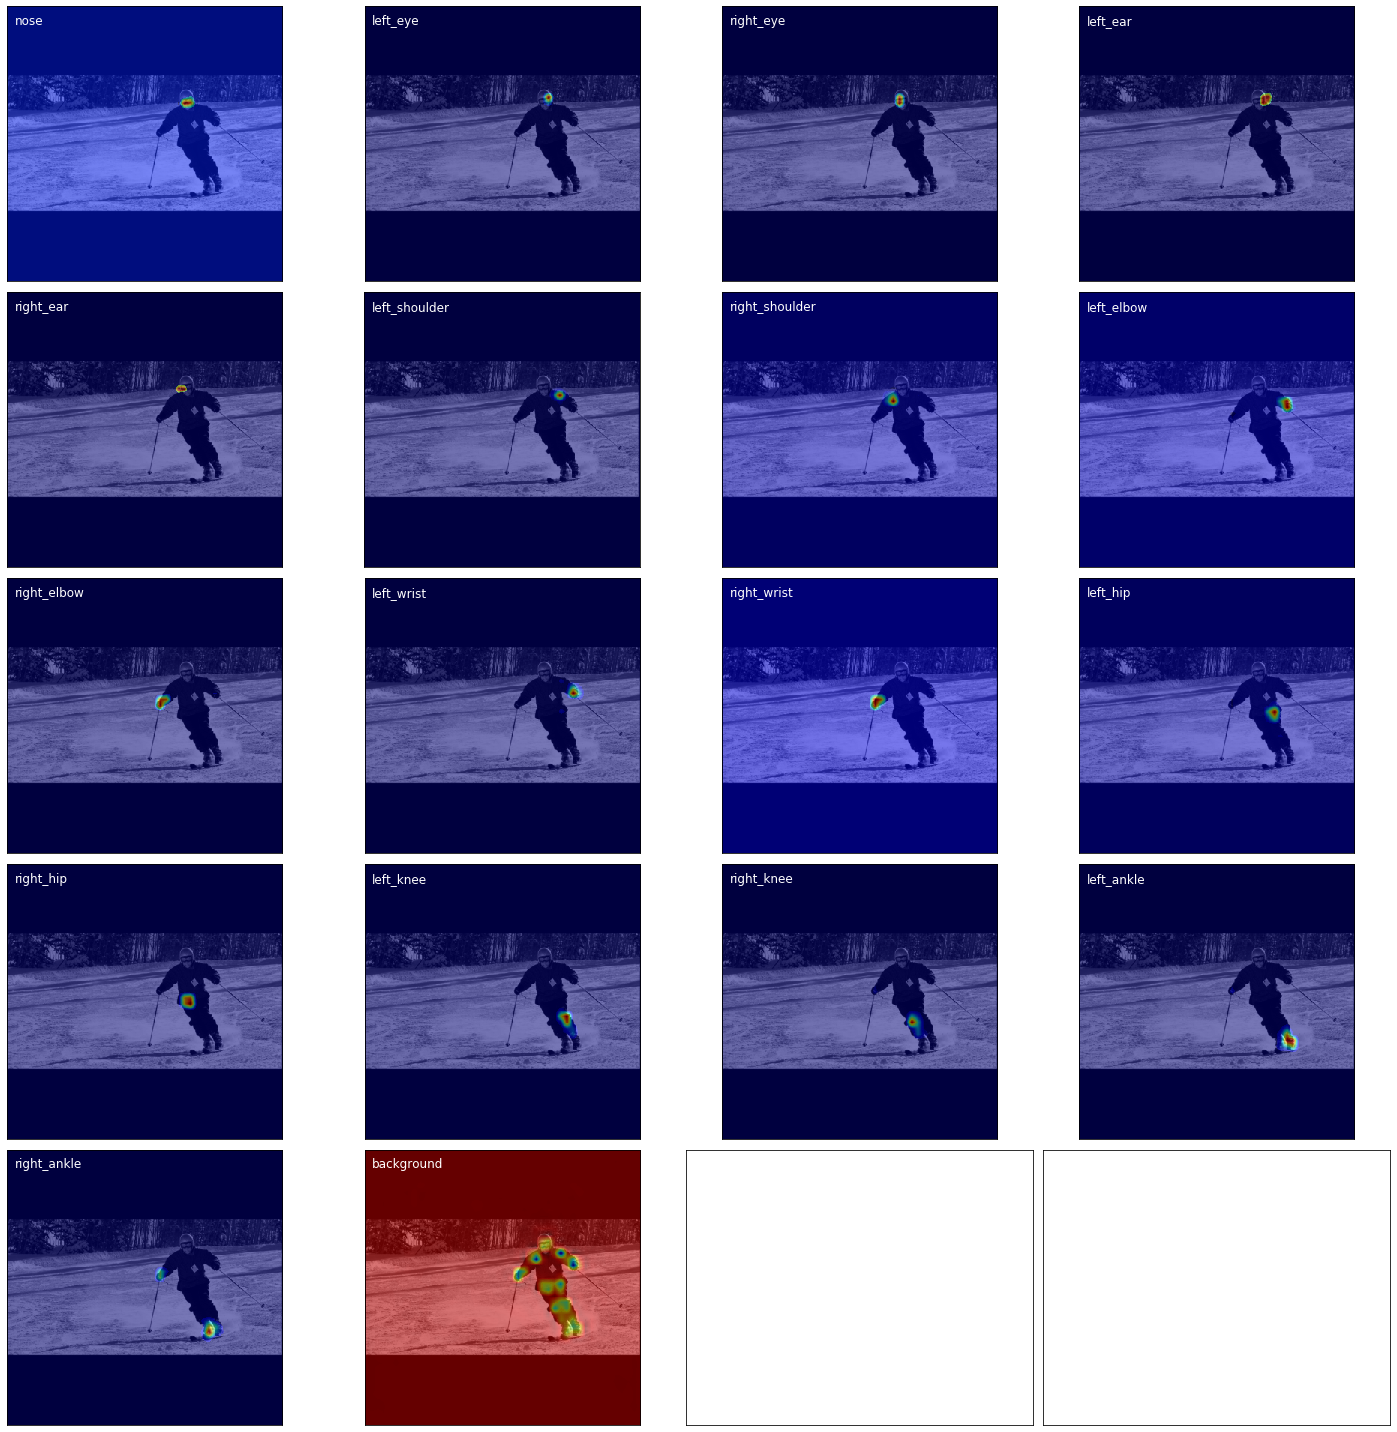

In [24]:
idx = 5
im = imgs[idx]
pf = scaled_pafs[idx].clone()
hm = scaled_hms[idx].clone()
pf[torch.abs(pf)<1e-1] = 0
hm[torch.abs(hm)<1e-1] = 0

un_im = To_Pil(un(im)[0])
plt.imshow(un_im)
plot_utils.plot_pafs(un_im, pf.cpu().numpy(), figsize=(20,20))
plot_utils.plot_heatmaps(un_im, hm.cpu().numpy(), figsize=(20,20))

In [22]:
test_tensor_tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
stride = 2
R_368x368 = Resize(368//stride)
R_46x46 = transforms.Resize(46//stride)

test_img_368x368 = R_368x368(Image.open('./test-images/1.jpg'))
test_img_46x46 = R_46x46(test_img_368x368)

im = test_tensor_tfms(test_img_368x368)[:3]
im_46x46 = test_tensor_tfms(test_img_46x46)[:3]

In [23]:
with torch.no_grad():
    model.eval()
    pred_pafs_stages, pred_hms_stages = model(im[None].to(device), im_46x46[None].to(device))
    scaled_pafs = F.interpolate(pred_pafs_stages, 368//stride, mode="bilinear", align_corners=True).to(device)
    scaled_hms = F.interpolate(pred_hms_stages, 368//stride, mode="bilinear", align_corners=True).to(device)

In [14]:
for z in range(18):
    print(hm[z].max())

tensor(0.9430)
tensor(0.8277)
tensor(0.8154)
tensor(0.7231)
tensor(0.3102)
tensor(2.0964)
tensor(1.4244)
tensor(0.7341)
tensor(0.)
tensor(1.6450)
tensor(0.7010)
tensor(0.5625)
tensor(0.4002)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(1.2003)


In [59]:
from skimage.feature import peak_local_max

im = hm[9].numpy()
coordinates = peak_local_max(im, min_distance=10)

In [60]:
coordinates

array([[117, 150]])

In [32]:
hm[0].max()

tensor(0.9430)

In [33]:
hm[0][(50,50)]

tensor(0.9430)

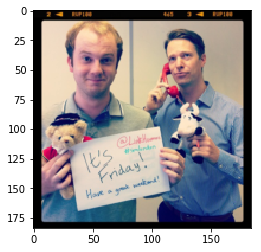

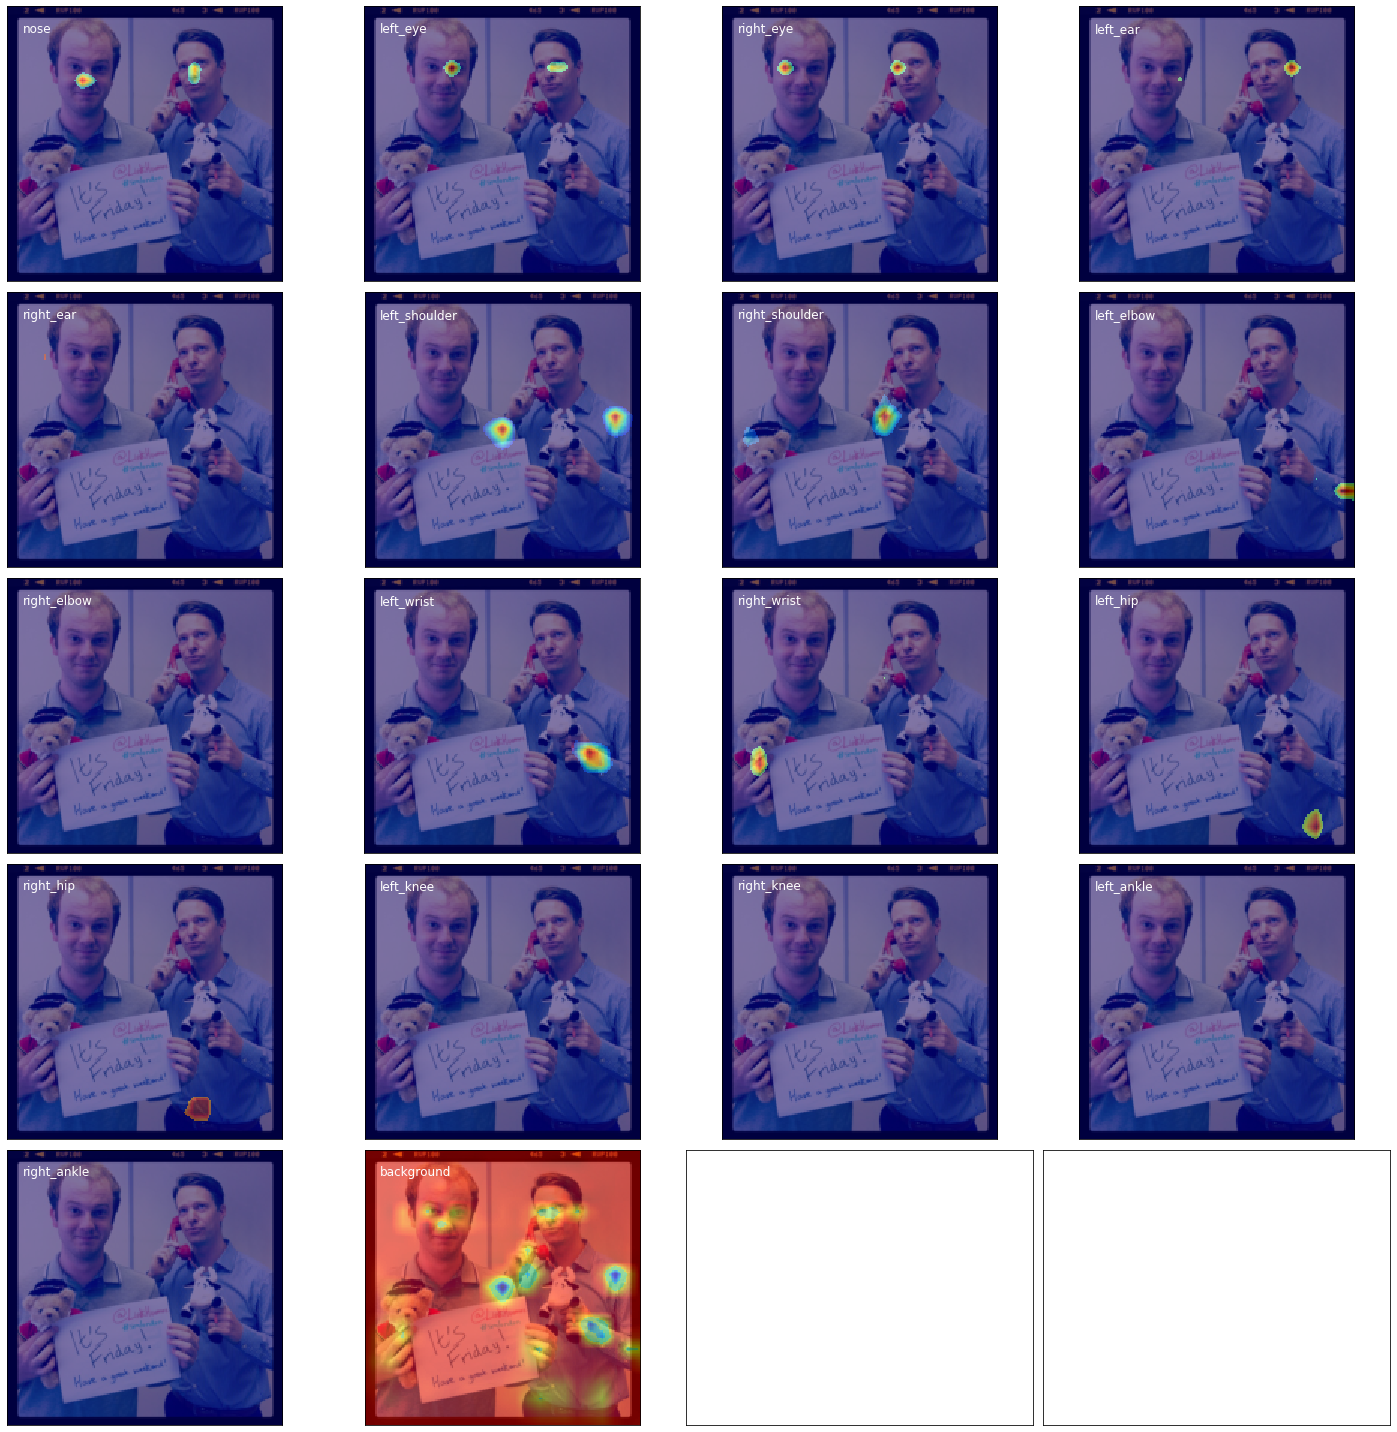

In [25]:
idx = 0
#pf = scaled_pafs[idx].clone()
hm = scaled_hms[idx].clone()
#pf[torch.abs(pf)<1e-1] = 0
hm[torch.abs(hm)<3e-1] = 0

un_im = To_Pil(un(im)[0])
plt.imshow(un_im)
#plot_utils.plot_pafs(un_im, pf.numpy(), figsize=(20,20))
plot_utils.plot_heatmaps(un_im, hm.numpy(), figsize=(20,20))

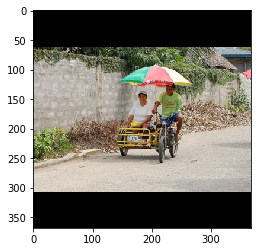

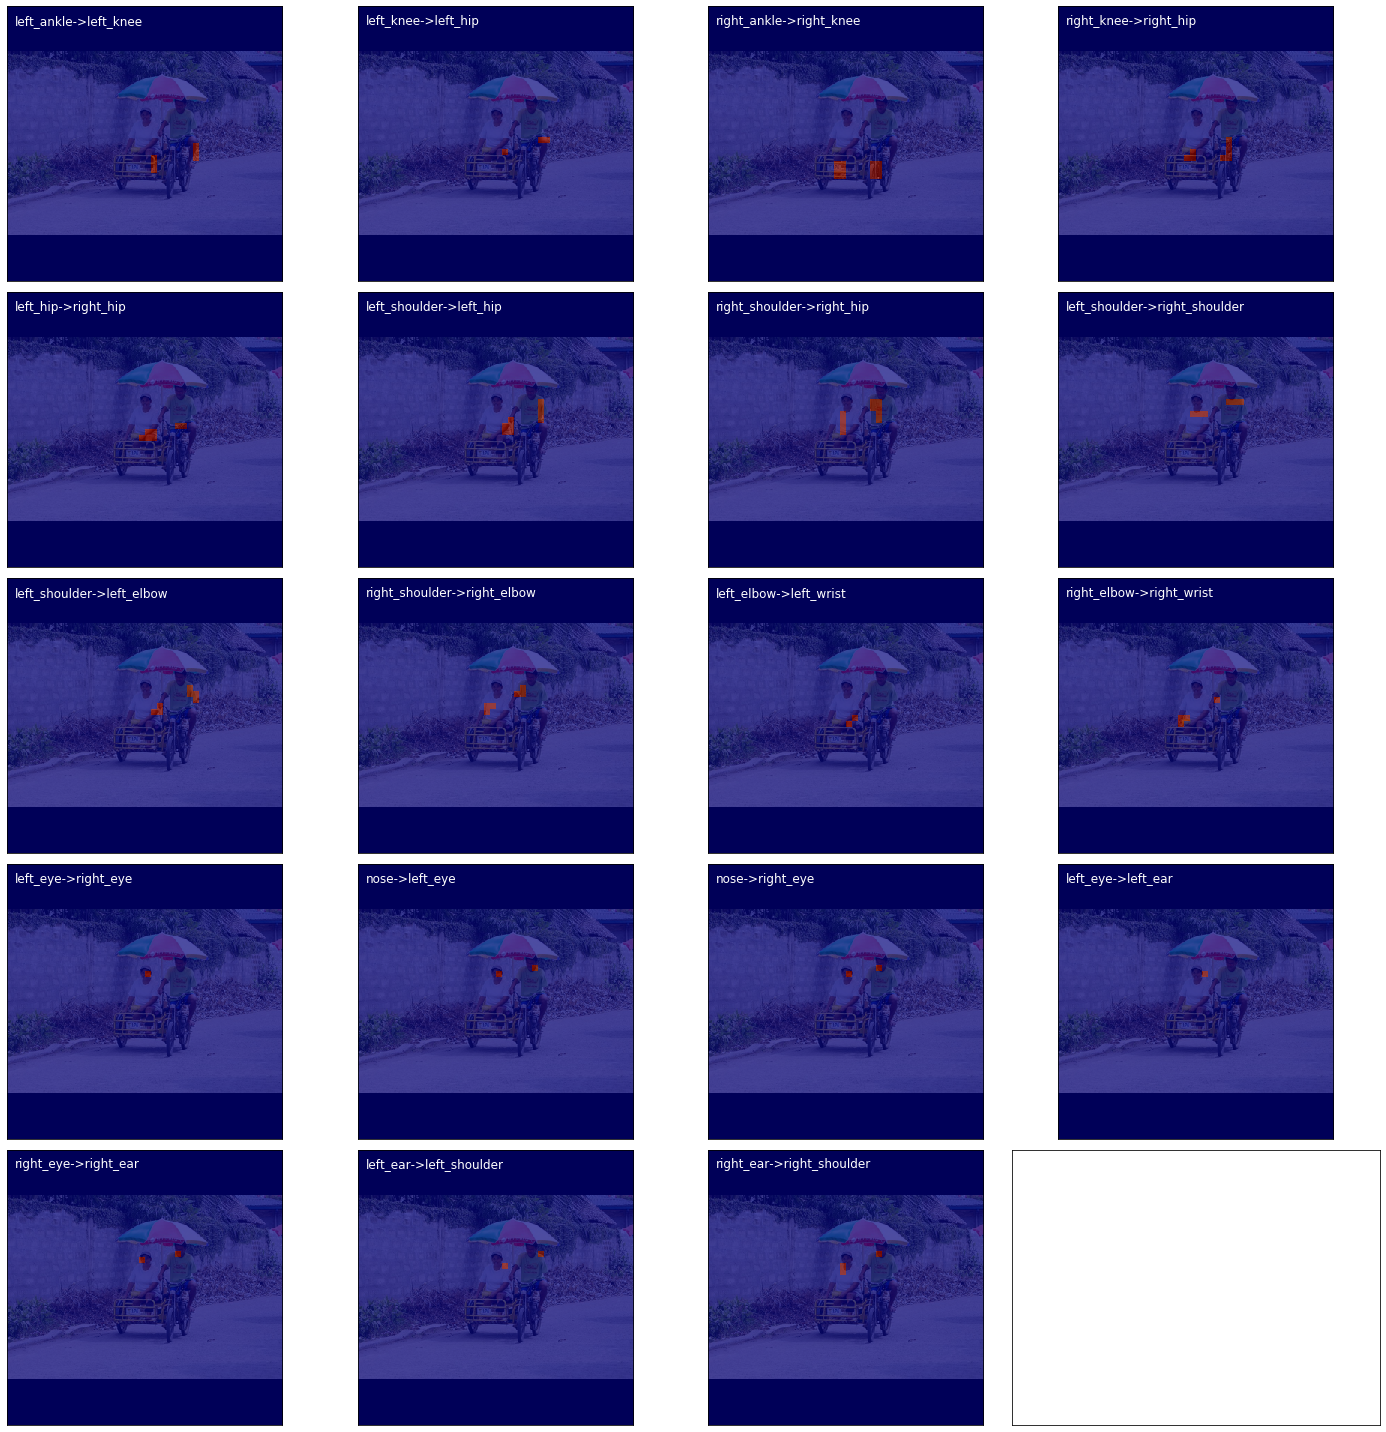

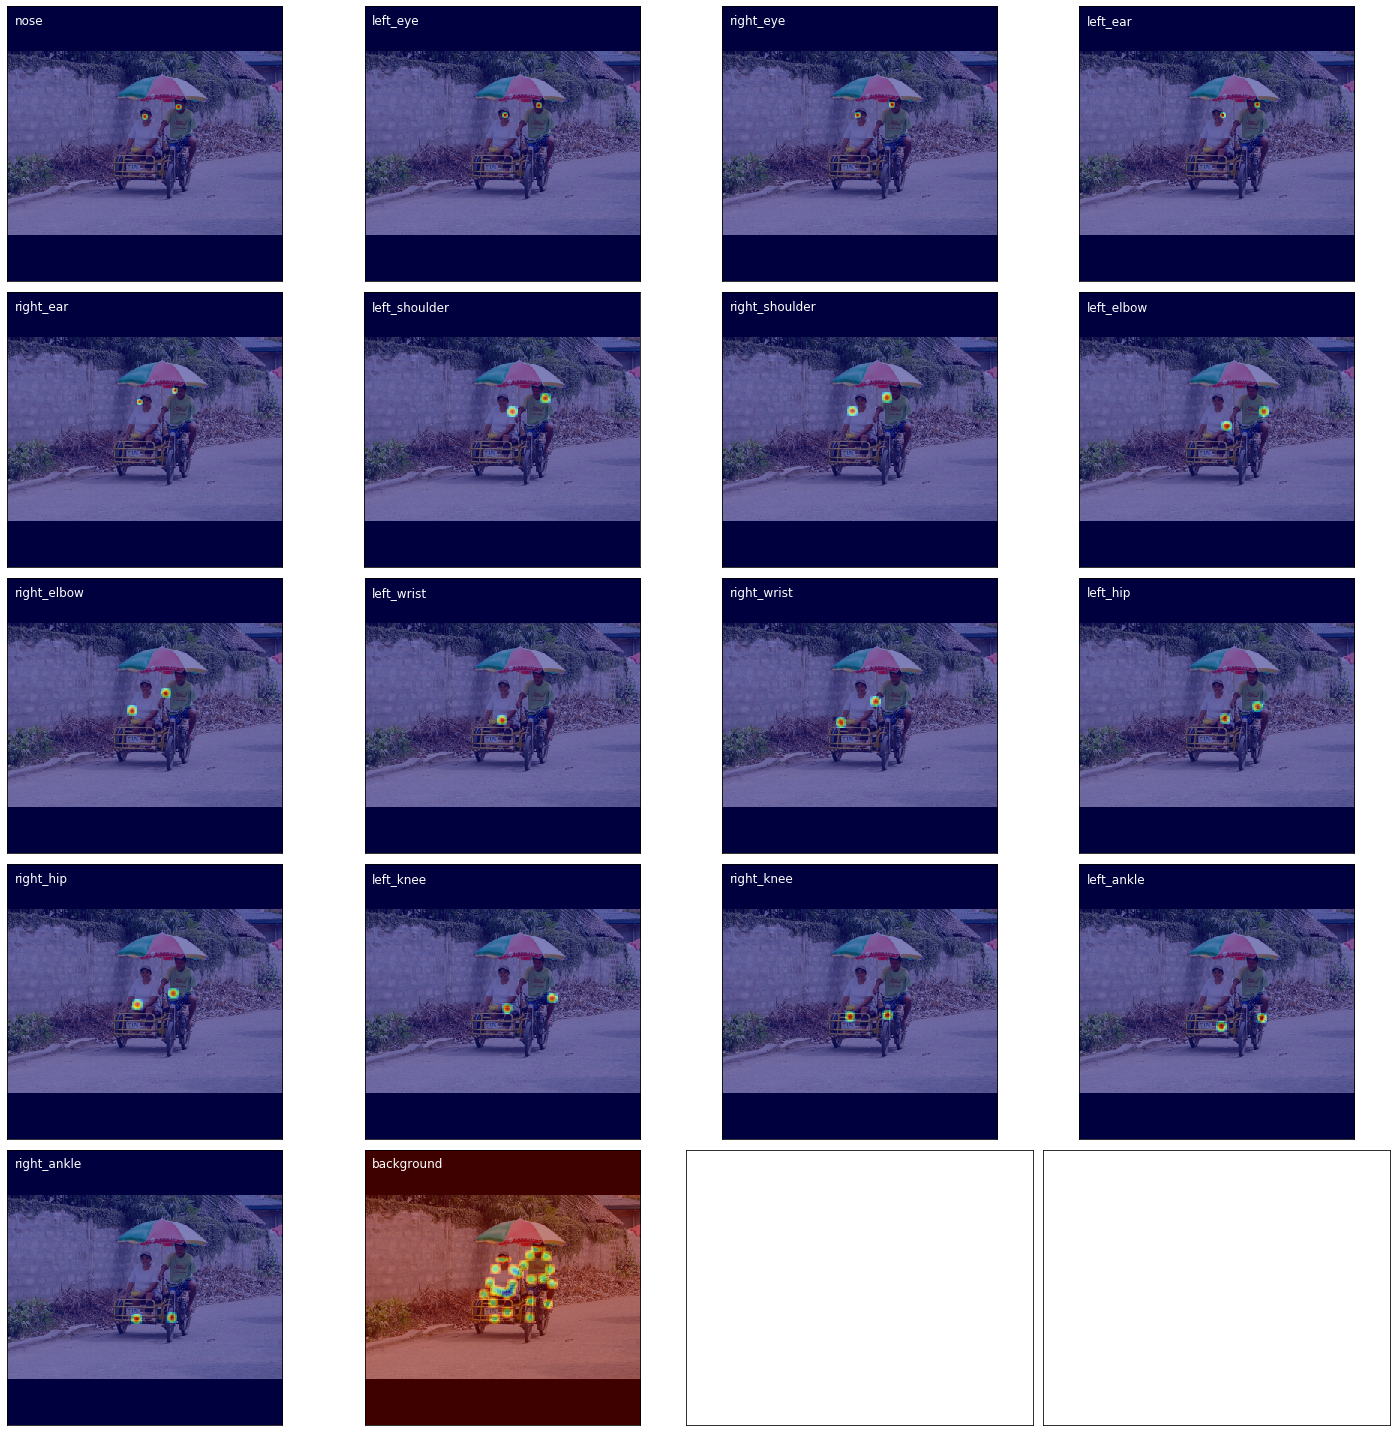

In [6]:
i,i_46x46,pafs,paf_ind,hms,hms_ind = ds[0]
scaled_pafs = F.interpolate(pafs[None].clone().detach(), 368, mode="nearest").to(device)[0] #mode="nearest|area"
#scaled_hms = F.interpolate(hms[None].clone().detach(), 368, mode="bilinear", align_corners=True).to(device)[0]
un_im = p(un(i)[0])
plt.imshow(un_im)
plot_utils.plot_pafs(un_im, scaled_pafs.numpy(), figsize=(20,20))
plot_utils.plot_heatmaps(un_im, hms.numpy(), figsize=(20,20))